   ## Alvin Fajar Permana
   ### 210535614804
   ### S1 Teknik Informatika offering A

In [1]:
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
df.shape

(768, 9)

In [4]:
df.dropna(inplace=True)


In [5]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

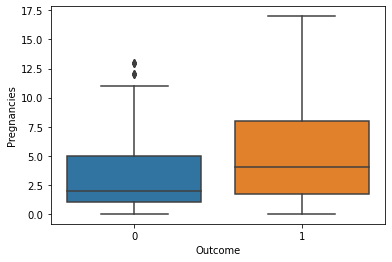

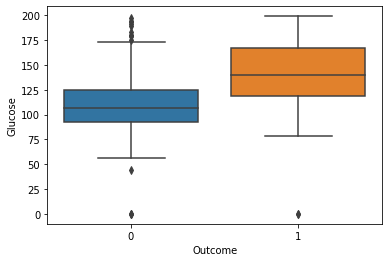

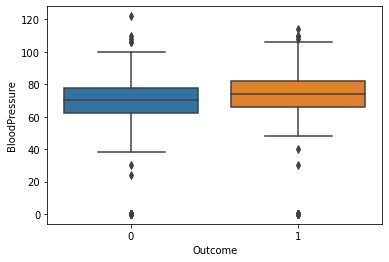

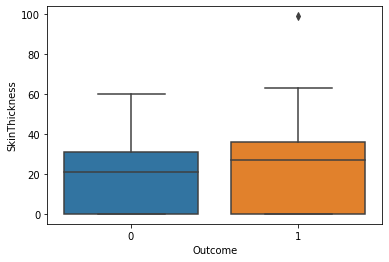

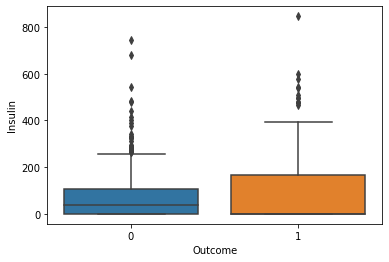

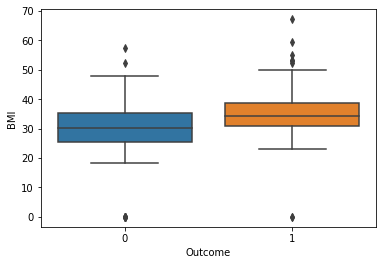

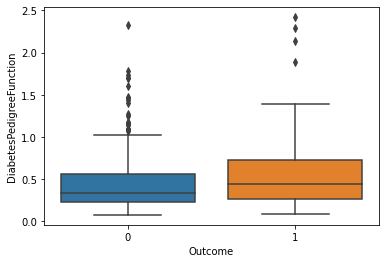

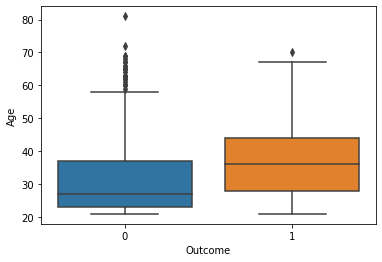

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to be plotted
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = ['Outcome']
# Loop over each feature and create boxplot
for feature in features:
    sns.boxplot(x="Outcome", y=feature, data=df)
    plt.show()


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

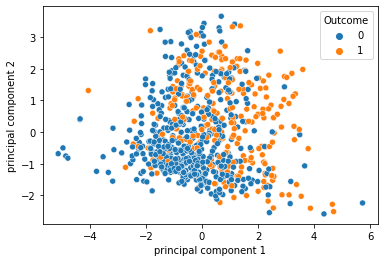

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Perform PCA with n_components = 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Concatenate with target
finalDf = pd.concat([principalDf, df[['Outcome']]], axis=1)

# Visualize result
import seaborn as sns
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Outcome', data=finalDf)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(finalDf.drop('Outcome', axis=1), finalDf['Outcome'], test_size=0.2, random_state=42)

# Create KNN model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train model with train data
knn.fit(X_train, y_train)

# Predict test data
y_pred = knn.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6428571428571429


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Outcome', axis=1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Outcome'], test_size=0.2, random_state=42)

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6883116883116883


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Perform PCA with n_components = 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

# Create new dataframe with principal components and target
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Outcome']]], axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(finalDf.drop('Outcome', axis=1), finalDf['Outcome'], test_size=0.2, random_state=42)

# Train Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on test set
y_pred = gnb.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7077922077922078


In [12]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(finalDf.drop('Outcome', axis=1), finalDf['Outcome'], test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6688311688311688


In [13]:

from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on test set
y_pred = dt.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.5844155844155844


In [14]:
#tanpa pca
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Outcome', axis=1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Outcome'], test_size=0.2, random_state=42)

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)



Accuracy: 0.6883116883116883


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Outcome', axis=1))

# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['Outcome'], test_size=0.2, random_state=42)

# Train Neural Network
clf = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7337662337662337


## menggunakan dataset breastcancer


In [16]:
df2 = pd.read_csv('./data.csv')
df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df2.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
df2.shape


(569, 31)

In [19]:
# Memilih kolom fitur dan kolom target
features = df2.drop(['diagnosis'], axis=1)
target = df2['diagnosis']

# Mengecek bentuk dari X dan y
print("Shape of features:", features.shape)
print("Shape of target:", target.shape)

Shape of features: (569, 30)
Shape of target: (569,)


In [20]:
#knn classifier 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.2, stratify=target)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(X_train, y_train)
y_pred= clf2.predict(X_test)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M'], dtype=object)

In [22]:
print("X train dimensions : {}".format(X_train.shape))
print("X test dimensions : {}".format(X_test.shape))
print("y train dimensions : {}".format(y_train.shape))
print("y test dimensions : {}".format(y_test.shape))

X train dimensions : (455, 30)
X test dimensions : (114, 30)
y train dimensions : (455,)
y test dimensions : (114,)


In [23]:
training_acc = clf2.score(X_train, y_train)
test_acc = clf2.score(X_test, y_test)
training_acc, test_acc

(0.9472527472527472, 0.9385964912280702)

In [24]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
301,12.460,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,...,13.46,23.07,88.13,551.3,0.1050,0.21580,0.1904,0.07625,0.2685,0.07764
83,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,...,20.33,32.72,141.30,1298.0,0.1392,0.28170,0.2432,0.18410,0.2311,0.09203
449,21.100,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.1368,0.31010,0.4399,0.22800,0.2268,0.07425
352,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.19130,0.1956,0.06121,...,33.13,23.58,229.30,3234.0,0.1530,0.59370,0.6451,0.27560,0.3690,0.08815
501,13.820,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,16.01,32.94,106.00,788.0,0.1794,0.39660,0.3381,0.15210,0.3651,0.11830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,14.900,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,16.35,27.57,125.40,832.7,0.1419,0.70900,0.9019,0.24750,0.2866,0.11550
167,16.780,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,0.1893,0.05534,...,20.05,26.30,130.70,1260.0,0.1168,0.21190,0.2318,0.14740,0.2810,0.07228
563,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.1407,0.41860,0.6599,0.25420,0.2929,0.09873
174,10.660,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.00000,0.1928,0.05975,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.0000,0.00000,0.2710,0.06164


In [25]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
507,11.060,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.042680,0.1954,0.07976,...,11.690,20.74,76.08,411.1,0.16620,0.20310,0.12560,0.09514,0.2780,0.11680
183,11.410,14.92,73.53,402.0,0.09059,0.08155,0.06181,0.023610,0.1167,0.06217,...,12.370,17.70,79.12,467.2,0.11210,0.16100,0.16480,0.06296,0.1811,0.07427
412,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,...,9.965,27.99,66.61,301.0,0.10860,0.18870,0.18680,0.02564,0.2376,0.09206
523,13.710,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.037830,0.1714,0.06843,...,15.110,25.63,99.43,701.9,0.14250,0.25660,0.19350,0.12840,0.2849,0.09031
311,14.610,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.018770,0.1632,0.05255,...,16.460,21.75,103.70,840.8,0.10110,0.07087,0.04746,0.05813,0.2530,0.05695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.052520,0.2378,0.09502,...,10.280,16.38,69.05,300.2,0.19020,0.34410,0.20990,0.10250,0.3038,0.12520
86,14.480,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.049380,0.2075,0.05636,...,16.210,29.25,108.40,808.9,0.13060,0.19760,0.33490,0.12250,0.3020,0.06846
407,12.850,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.018670,0.1580,0.06114,...,14.400,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
487,19.440,18.82,128.10,1167.0,0.10890,0.14480,0.22560,0.119400,0.1823,0.06115,...,23.960,30.39,153.90,1740.0,0.15140,0.37250,0.59360,0.20600,0.3266,0.09009


In [26]:
#import confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix

#accuracy
confm_knn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(confm_knn)

Confusion Matrix
[[71  1]
 [ 6 36]]


In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy knn : {}".format(accuracy_score(y_test, y_pred)))

Accuracy knn : 0.9385964912280702


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.9415204678362573
Precision: 0.9399403874813711
Recall: 0.9338624338624338
F1 score: 0.936741639538325


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9473684210526315


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features) 

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.9590643274853801
Precision: 0.9574578277596922
Recall: 0.9543650793650793
F1 score: 0.9558709677419355


In [50]:
#gaussian naive bayes
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features) 

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on test set
y_pred = gnb.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.935672514619883
Precision: 0.9321544835750222
Recall: 0.9292328042328042
F1 score: 0.9306543778801843


In [52]:
#Random Forest Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

#Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

#Train Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

#Make predictions on test set
y_pred = rfc.predict(X_test)

#Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.9707602339181286
Precision: 0.9736486486486486
Recall: 0.9636243386243386
F1 score: 0.9682592716338123


In [53]:
# Decision Tree Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Make predictions on test set
y_pred = dtc.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.9415204678362573
Precision: 0.9333381171067738
Recall: 0.9437830687830688
F1 score: 0.9379535558780842


In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

# Train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on test set
y_pred = mlp.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.9766081871345029
Precision: 0.9748677248677249
Recall: 0.9748677248677249
F1 score: 0.9748677248677249


In [62]:
#batas pca

In [63]:
#bataspca

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

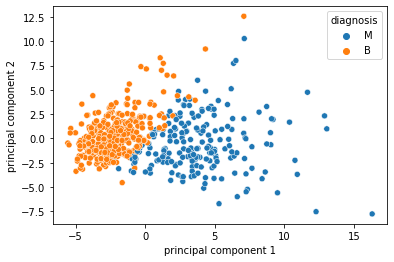

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Perform PCA with n_components = 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Concatenate with target
finalDf = pd.concat([principalDf, df2[['diagnosis']]], axis=1)

# Visualize result
import seaborn as sns
sns.scatterplot(x='principal component 1', y='principal component 2', hue='diagnosis', data=finalDf)


In [47]:
# knn pca
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Standardize the data
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)

# Fit the PCA model on the standardized data
pca = PCA(n_components=2)
pca.fit(scaled_features)

# Transform the data using the fitted PCA model
pca_features = pca.transform(scaled_features)

# Split the transformed data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca_features, target, test_size=0.3, random_state=42)

# Train the KNN model on the transformed train set
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

# Make predictions on the transformed test set
y_pred_pca = knn_pca.predict(X_test_pca)

# Evaluate the model performance on the transformed test set
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='macro')
recall_pca = recall_score(y_test, y_pred_pca, average='macro')
f1_pca = f1_score(y_test, y_pred_pca, average='macro')
print('Accuracy (with PCA):', accuracy_pca)
print('Precision (with PCA):', precision_pca)
print('Recall (with PCA):', recall_pca)
print('f1 score (with PCA):', f1_pca)


Accuracy (with PCA): 0.9415204678362573
Precision (with PCA): 0.9349782293178519
Recall (with PCA): 0.9404761904761905
f1 score (with PCA): 0.9375730140186915


In [55]:
# gaussian naive bayes pca
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

#Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#Fit the PCA model on the standardized data
pca = PCA(n_components=2)
pca.fit(scaled_features)

#Transform the data using the fitted PCA model
pca_features = pca.transform(scaled_features)

#Split the transformed data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca_features, target, test_size=0.3, random_state=42)

#Train the Gaussian Naive Bayes model on the transformed train set
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train)

#Make predictions on the transformed test set
y_pred_pca = gnb_pca.predict(X_test_pca)

#Evaluate the model performance on the transformed test set
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='macro')
recall_pca = recall_score(y_test, y_pred_pca, average='macro')
f1_pca = f1_score(y_test, y_pred_pca, average='macro')
print('Accuracy (with PCA):', accuracy_pca)
print('Precision (with PCA):', precision_pca)
print('Recall (with PCA):', recall_pca)
print('f1 score (with PCA):', f1_pca)

Accuracy (with PCA): 0.9181286549707602
Precision (with PCA): 0.9144560357675111
Recall (with PCA): 0.9087301587301587
f1 score (with PCA): 0.9114382953536551


In [58]:
# Random forest pca
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit the PCA model on the standardized data
pca = PCA(n_components=2)
pca.fit(scaled_features)

# Transform the data using the fitted PCA model
pca_features = pca.transform(scaled_features)

# Split the transformed data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca_features, target, test_size=0.3, random_state=42)

# Train Random Forest Classifier on the transformed train set
rfc_pca = RandomForestClassifier(random_state=42)
rfc_pca.fit(X_train_pca, y_train)

# Make predictions on the transformed test set
y_pred_pca = rfc_pca.predict(X_test_pca)

# Evaluate the model performance on the transformed test set
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='macro')
recall_pca = recall_score(y_test, y_pred_pca, average='macro')
f1_pca = f1_score(y_test, y_pred_pca, average='macro')
print('Accuracy (with PCA):', accuracy_pca)
print('Precision (with PCA):', precision_pca)
print('Recall (with PCA):', recall_pca)
print('f1 score (with PCA):', f1_pca)


Accuracy (with PCA): 0.9532163742690059
Precision (with PCA): 0.9497354497354498
Recall (with PCA): 0.9497354497354498
f1 score (with PCA): 0.9497354497354498


In [60]:
# Decision tree pca
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Standardize the data
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

# Fit the PCA model on the standardized data
pca = PCA(n_components=2)
pca.fit(scaled_features)

# Transform the data using the fitted PCA model
pca_features = pca.transform(scaled_features)

# Split the transformed data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca_features, target, test_size=0.3, random_state=42)

# Train the Decision Tree model on the transformed train set
dtc_pca = DecisionTreeClassifier(random_state=42)
dtc_pca.fit(X_train_pca, y_train)

# Make predictions on the transformed test set
y_pred_pca = dtc_pca.predict(X_test_pca)

# Evaluate the model performance on the transformed test set
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='macro')
recall_pca = recall_score(y_test, y_pred_pca, average='macro')
f1_pca = f1_score(y_test, y_pred_pca, average='macro')

print('Accuracy (with PCA):', accuracy_pca)
print('Precision (with PCA):', precision_pca)
print('Recall (with PCA):', recall_pca)
print('F1 score (with PCA):', f1_pca)


Accuracy (with PCA): 0.9181286549707602
Precision (with PCA): 0.907928388746803
Recall (with PCA): 0.921957671957672
F1 score (with PCA): 0.9136363636363636


In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Fit the PCA model on the standardized data
pca = PCA(n_components=2)
pca.fit(scaled_features)

# Transform the data using the fitted PCA model
pca_features = pca.transform(scaled_features)

# Split the transformed data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca_features, target, test_size=0.3, random_state=42)

# Train the MLP model on the transformed train set
mlp_pca = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp_pca.fit(X_train_pca, y_train)

# Make predictions on the transformed test set
y_pred_pca = mlp_pca.predict(X_test_pca)

# Evaluate the model performance on the transformed test set
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='macro')
recall_pca = recall_score(y_test, y_pred_pca, average='macro')
f1_pca = f1_score(y_test, y_pred_pca, average='macro')

print('Accuracy (with PCA):', accuracy_pca)
print('Precision (with PCA):', precision_pca)
print('Recall (with PCA):', recall_pca)
print('F1 score (with PCA):', f1_pca)


Accuracy (with PCA): 0.9649122807017544
Precision (with PCA): 0.965424739195231
Recall (with PCA): 0.9589947089947091
F1 score (with PCA): 0.962044983722995


In [ ]:
target.keys()

In [ ]:
features.keys()